In [19]:
!pip install yellowbrick

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
diabetes=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Preparing data for ML/diabetes_process_complete.csv')

In [22]:
diabetes=diabetes.drop(['Unnamed: 0',],axis=1)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,158.510349,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,32.0,174.634129,30.1,0.349,47.0,1


In [23]:
diabetes_corr=diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.104428,0.069769,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.196435,0.697793,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.208295,0.128439,0.281063,-0.002763,0.324595,0.166074
SkinThickness,0.104428,0.196435,0.208295,1.000000,0.203299,0.522159,0.077395,0.158825,0.220678
Insulin,0.069769,0.697793,0.128439,0.203299,1.000000,0.268167,0.134505,0.215751,0.357815
BMI,0.021546,0.231400,0.281063,0.522159,0.268167,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.077395,0.134505,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.158825,0.215751,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.220678,0.357815,0.312249,0.173844,0.238356,1.000000


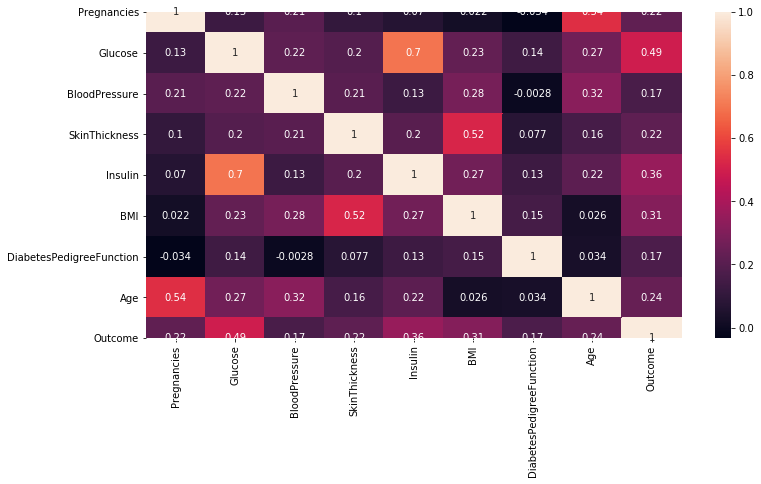

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(diabetes_corr,annot=True)
plt.show()

In [27]:
x=diabetes[['Insulin','BMI','BloodPressure','DiabetesPedigreeFunction']]
y=diabetes['Age']

In [28]:
feature_name=x.columns
feature_name

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

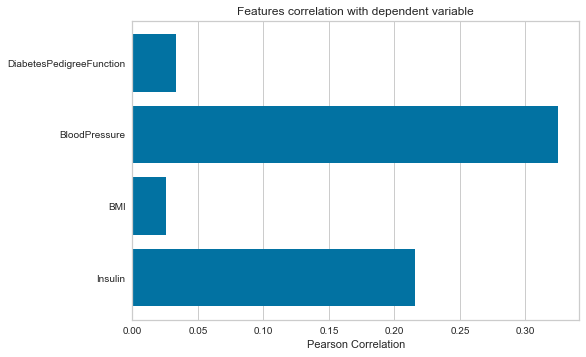

In [35]:
from yellowbrick.target import FeatureCorrelation
visualizer=FeatureCorrelation(labels=feature_name,method='pearson')
visualizer.fit(x,y)
visualizer.poof()

In [39]:
visualizer.scores_


array([0.21575125, 0.02574447, 0.32459494, 0.03356131])

In [40]:
visualizer.features_

array(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'],
      dtype=object)

In [42]:
score_df=pd.DataFrame({'features_names' : visualizer.features_,'scores' : visualizer.scores_})
score_df

,features_names,scores
0,Insulin,0.215751
1,BMI,0.025744
2,BloodPressure,0.324595
3,DiabetesPedigreeFunction,0.033561


In [44]:
x=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [45]:
feature_name=x.columns
feature_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

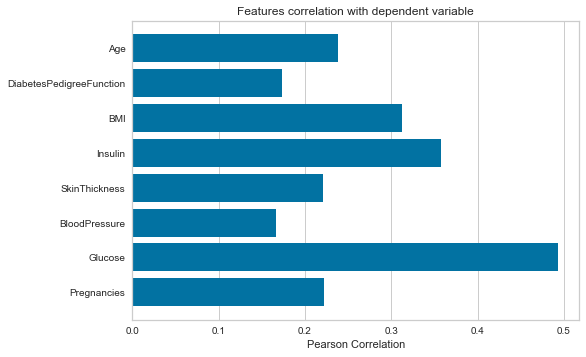

In [46]:
visualizer=FeatureCorrelation(labels=feature_name,method='pearson')
visualizer.fit(x,y)
visualizer.poof()

Pregnancies is discrete value

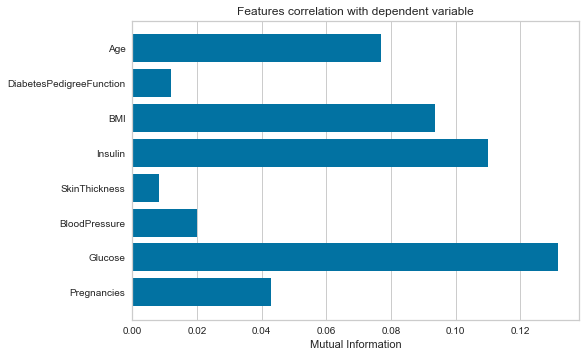

In [47]:
discrete_features=[False for _ in range(len(feature_name))]
discrete_features[0]=True
visualizer=FeatureCorrelation(labels=feature_name,method='mutual_info-classification')
visualizer.fit(x,y,discrete_features=discrete_features,random_state=0)
visualizer.poof()

In [48]:
feature_to_plot=['Age','Insulin','BMI','BloodPressure','Glucose']

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


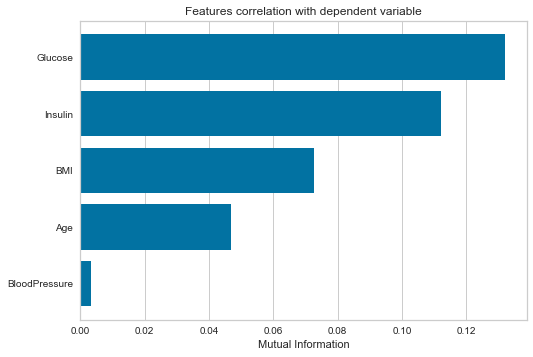

In [49]:
visualizer=FeatureCorrelation(feature_names=feature_to_plot,method='mutual_info-classification',sort=True)
visualizer.fit(x,y,random_state=0)
visualizer.poof()